# Bike Sharing Prediction

In this project, we will build a simple neural network from scratch and use it to predict daily bike rental ridership.

Bike sharing systems are the new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic: Through these systems, the user is able to easily rent a bike from a particular position and return it back at another position.

Currently, there are about over 500 bike sharing programs around the world, involving more than 500 thousands bicycles, and it exists great interest in these systems due to their important role in traffic, environmental and health issues.

In [1]:
# Needed packages imports:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import unittest, sys
from neural_network import NeuralNetwork

## The data set in action

### A quick introduction

Bike sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of the week, season, hour of the day, etc, etc... can affect the rental behaviors.

Here, the core data set is related to the two-year historical log corresponding to years 2011 and 2012 from **Capital Bikeshare system** (Washington D.C., USA), which is publicly available at http://capitalbikeshare.com/system-data. We have aggregated the data on two hourly and daily basis, and then we have extracted and added the corresponding weather and seasonal information.

*Some remarks:*
- Weather information has been extracted from http://www.freemeteo.com.
- Count of rented bikes is also correlated to some events in the town which easily are traceable via search engines. For instance, a query like "2012-10-30 washington d.c." in Google returns related results to *Hurricane Sandy*. Some of the important events are identified in the article "Event labeling combining ensemble detectors and background knowledge" by Hadi Fanaee-T and Joao Gama, published in 2013 in the journal Progress in Artificial Intelligence. Therefore the data can be used for validation of anomaly or event detection algorithms as well.

### Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data.

In [2]:
# Shortcut variable to 'hour.csv':
data_path = 'bike_sharing_dataset/hour.csv'

# Load the data contained in 'hour.csv':
rides = pd.read_csv(data_path)

In [3]:
# Display the first 5 (value by default) rows of the loaded data:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Display the last 5 (value by default) rows of the loaded data:
rides.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first 5 rows and the last 5 rows of the data above.

Below, we can find a description of the different fields:
- *instant*: record index
- *dteday*: date
- *season*: season (1:spring, 2:summer, 3:autumn, 4:winter)
- *yr*: year (0: 2011, 1:2012)
- *mnth*: month (1 to 12)
- *hr*: hour (0 to 23)
- *holiday*: weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- *weekday*: day of the week
- *workingday*: if day is neither weekend nor holiday is 1, otherwise is 0
- *weathersit*: 
    - 1: clear, few clouds, partly cloudy
    - 2: mist and cloudy, mist and broken clouds, mist and few clouds, mist
    - 3: light snow, light rain and thunderstorm and scattered clouds, light rain and scattered clouds
    - 4: heavy rain and ice pallets and thunderstorm and mist, snow and fog
- *temp*: normalized temperature in Celsius (the values are divided by 41 (max))
- *atemp*: normalized feeling temperature in Celsius (the values are divided by 50 (max))
- *hum*: normalized humidity (the values are divided by 100 (max))
- *windspeed*: normalized wind speed (the values are divided by 67 (max))
- *casual*: count of casual users
- *registered*: count of registered users
- *cnt*: count of total rental bikes, including both casual and registered

Below is a plot showing the number of bike riders over the first 10 days or so in the data set (some days don't have exactly 24 entries in the data set, so it's not exactly 10 days). You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders.

We will be trying to capture all of this with our model.

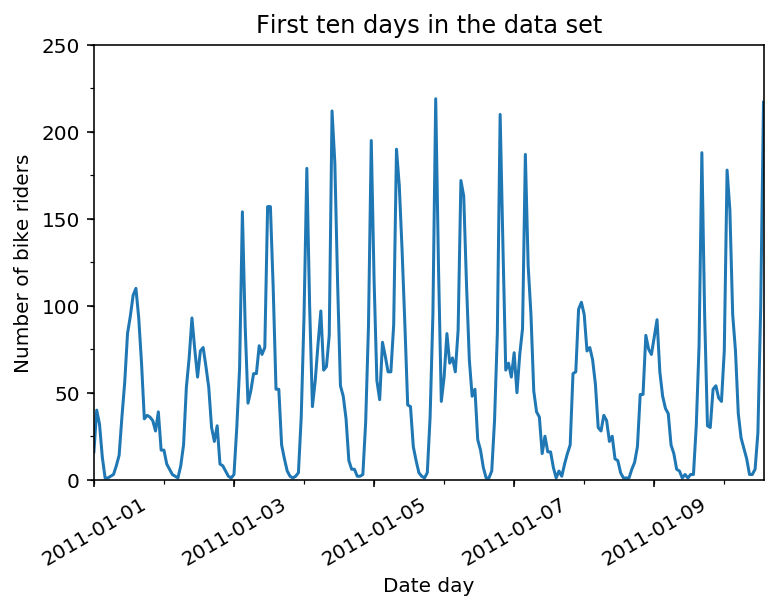

In [5]:
# Define the graph to plot:
ax = rides[:24*10].plot(x='dteday', y='cnt', legend=False)
ax.set_title('First ten days in the data set')

# Define the abscissa axis:
ax.set_xlabel('Date day')
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(10))
ax.xaxis.set_tick_params(rotation=30)

# Define the ordinate axis:
ax.set_ylabel('Number of bike riders')
ax.set_ylim(0, 250)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(6))
ax.yaxis.set_minor_locator(mpl.ticker.MaxNLocator(11))

# Save the plotted graph:
fig = ax.get_figure()
fig.savefig('graphs/first_ten_days_graph.png', bbox_inches = 'tight')

### Dummy variables
Here we have some categorical variables like *season*, *weakday* or *mnth*. To include these in our model, we will need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [6]:
# Determine the fields to dummify:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

# Create dummy variables and add them to the data set:
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

# Drop some now useless variables from the data set:
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)

# Display the first 5 (value by default) rows of the new data set:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Scaling target variables

To make training the network easier, we will standardize each of the continuous variables. That is, we will shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [7]:
# Determine the continuous variables to standardize:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

# Store scalings in a dictionary to convert back later and standardize:
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

### Splitting the data into training, testing, and validation sets

We will save the data for the last approximately 21 days to use as a test set after the training of the network. We will use this set to make predictions and compare them with the actual number of riders.

In [8]:
# Save data for approximately the last 21 days: 
test_data = data[-21*24:]

# Remove the test data from the data set: 
data = data[:-21*24]

# Separate the data into features and targets:
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We will split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we will train on historical data, then try to predict on future data (the validation set).

In [9]:
# Hold out the last 60 days or so of the remaining data as a validation set:
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

## Time to build the network

Below we will build our network: We have built out the structure and we will implement both the forward pass and backwards pass through the network.

We will also have to set the **hyperparameters**: the **learning rate**, the **number of hidden units**, and the **number of training passes**.

<img src="assets/neural_network.png" width=300px>

The network has three layers: an **input layer**, an **hidden layer** and an **output layer**.

The hidden layer will use the sigmoid function for activation. The output layer has only one node and is used for the regression about the predication of bike rental count hourly based on the environmental and seasonal settings. The output of the node is the same as the input of the node, that is, the activation function is $f(x)=x$, the identity function.

A function that takes the input signal and generates an output signal, taking into account the threshold, is called an **activation function**. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called **forward propagation**.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called **backpropagation**.

The detail of this built neural network can be found in the file ***neural_network.py***.

To evaluate the quality of our built neural network, we will use the Mean Squared Error (MSE) **loss function**, which is widely used in linear regression as the performance measure.

In [10]:
def MSE(y, Y):
    ''' Mean Squared Error (MSE) loss function.
        Parameters:
         y - predicted values
         Y - target values
        Returns:
         mse_error - mean squared error
    '''
    
    mse_error = np.mean((y-Y)**2)
    
    return mse_error

### Unit tests

To check and make sure our network was correctly implemented before starting the training it we will run some unit tests: All have to be successful.

In [11]:
################################################################
# Define a particular configuration to test our neural network #
################################################################

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

#####################################
# Define some unit tests to perform #
#####################################

class TestMethods(unittest.TestCase):

    # Unit tests for data loading:
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered:
        self.assertTrue(data_path.lower() == 'bike_sharing_dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded:
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    # Unit tests for network functionality:

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid:
        self.assertTrue(np.all(network.activation_function(0.5) == 1./(1.+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training:
        
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method:
        
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))
        
#########################################################
# Run the defined unit tests plan on our neural network #
#########################################################

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner(verbosity=2).run(suite)

test_activation (__main__.TestMethods) ... ok
test_data_loaded (__main__.TestMethods) ... ok
test_data_path (__main__.TestMethods) ... ok
test_run (__main__.TestMethods) ... ok
test_train (__main__.TestMethods) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.013s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

All the unit tests are OK!

## Training the network

Here, we will set the hyperparameters for the network. The strategy is to find hyperparameters such that the error on the training set is low, and at the same time avoid overfitting to the data. If we train the network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

We will also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, we grab a random sample of the data instead of using the whole data set. we use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network more efficiently.

### Choose the number of iterations

This is the number of batches of samples from the training data we will use to train the network. The more iterations we use, the better the model will fit the data. However, this process can have sharply diminishing returns and can waste computational resources if we use too many iterations. We want to find a number here where the network has a low training loss, and the validation loss is at a minimum. The ideal number of iterations would be a level that stops shortly after the validation loss is no longer decreasing.

### Choose the learning rate

This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. Normally, a good choice to start at is 0.01 (other good options to consider are 0.1, 0.001, 0.0001 or 0.00001). In either case, if the network has problems fitting the data, a good idea is to try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

### Choose the number of hidden nodes

In a model where all the weights are optimized, the more hidden nodes we have, the more accurate the predictions of the model will be (a fully optimized model could have weights of 0, after all). However, the more hidden nodes we have, the harder it will be to optimize the weights of the model, and the more likely it will be that suboptimal weights will lead to overfitting. With overfitting, the model will memorize the training data instead of learning the true pattern, and won't generalize well to unseen data.  

We are going to try a few different numbers and see how it affects the performance.

We can look at the losses dictionary for a metric of the network performance. If the number of hidden units is too low, then the model won't have enough space to learn, and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units we choose: We will generally find that the best number of hidden nodes to use ends up being between the number of input and output nodes.

*Nota Bene:* Here, the number of input nodes is 56.

```python
input_nodes = train_features.shape[1]
print(input_nodes)
> 56
```

### Test phase

Now, we can begin the test phase.

For that, we are going to lock the number of input nodes, the number of output nodes and the number of iterations for the training, and we are going to perform tests, checking 3 values for the learning rate (0.5, 0.1, 0.01) and 2 values for the number of hidden nodes (20 and 40).

In [12]:
# Lock the fixed parameters of our neural network for the training:
input_nodes = 56
output_nodes = 1
iterations = 5000

In [13]:
def training_neural_network(input_nodes, hidden_nodes, output_nodes, learning_rate):
    ''' Evaluate the training and validation losses during the training of the neural network.
        Parameters:
         input_nodes - number of input nodes
         hidden_nodes - number of hidden nodes
         output_nodes - number of output nodes
         learning_rate - learning rate
        Returns:
         network - trained neural network
         losses - dictionary tracking the training and validation losses
    '''
    
    # Construction of the neural network:
    network = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    
    # Initialization of the losses dictionary:
    losses = {'train':[], 'validation':[]}
    
    # Training of the neural network:
    for ii in range(iterations):
        # Go through a random batch of 128 records from the training data set:
        batch = np.random.choice(train_features.index, size=128)
        X = train_features.loc[train_features.index[batch]].values
        y = train_targets.loc[train_targets.index[batch]]['cnt']
        # Training the network on the random batch of features and targets:
        network.train(X, y)
        # Printing out the training progress:
        train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
        val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
        sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                         + "% ... Training loss: " + str(train_loss)[:5] \
                         + " ... Validation loss: " + str(val_loss)[:5])
        sys.stdout.flush()
        # Tracking of the training and validation losses:
        losses['train'].append(train_loss)
        losses['validation'].append(val_loss)
        
    return network, losses

In [14]:
# Test 1 - learning_rate = 0.5, hidden_nodes = 20:
learning_rate = 0.5
hidden_nodes = 20
network_lr05_hn20, losses_lr05_hn20 = training_neural_network(input_nodes, hidden_nodes, output_nodes, learning_rate)

Progress: 100.0% ... Training loss: 0.070 ... Validation loss: 0.135

In [15]:
# Test 2 - learning_rate = 0.5, hidden_nodes = 40:
learning_rate = 0.5
hidden_nodes = 40
network_lr05_hn40, losses_lr05_hn40 = training_neural_network(input_nodes, hidden_nodes, output_nodes, learning_rate)

Progress: 100.0% ... Training loss: 0.737 ... Validation loss: 1.199

In [16]:
# Test 3 - learning_rate = 0.1, hidden_nodes = 20:
learning_rate = 0.1
hidden_nodes = 20
network_lr01_hn20, losses_lr01_hn20 = training_neural_network(input_nodes, hidden_nodes, output_nodes, learning_rate)

Progress: 100.0% ... Training loss: 0.253 ... Validation loss: 0.433

In [17]:
# Test 4 - learning_rate = 0.1, hidden_nodes = 40:
learning_rate = 0.1
hidden_nodes = 40
network_lr01_hn40, losses_lr01_hn40 = training_neural_network(input_nodes, hidden_nodes, output_nodes, learning_rate)

Progress: 100.0% ... Training loss: 0.264 ... Validation loss: 0.437

In [18]:
# Test 5 - learning_rate = 0.01, hidden_nodes = 20:
learning_rate = 0.01
hidden_nodes = 20
network_lr001_hn20, losses_lr001_hn20 = training_neural_network(input_nodes, hidden_nodes, output_nodes, learning_rate)

Progress: 100.0% ... Training loss: 0.440 ... Validation loss: 0.713

In [19]:
# Test 6 - learning_rate = 0.01, hidden_nodes = 40:
learning_rate = 0.01
hidden_nodes = 40
network_lr001_hn40, losses_lr001_hn40 = training_neural_network(input_nodes, hidden_nodes, output_nodes, learning_rate)

Progress: 100.0% ... Training loss: 0.412 ... Validation loss: 0.674

The following table summarize the obtained results:

|      Test     |   Learning Rate   |   Hidden Nodes    |   Training Loss   |   Validation Loss   |
| :-----------: | :---------------: | :---------------: | :---------------: | :-----------------: |
|       1       |        0.5        |        20         |        0.070      |        0.135        |
|       2       |        0.5        |        40         |        0.737      |        1.199        |
|       3       |        0.1        |        20         |        0.253      |        0.433        |
|       4       |        0.1        |        40         |        0.264      |        0.437        |
|       5       |        0.01       |        20         |        0.440      |        0.713        |
|       6       |        0.01       |        40         |        0.412      |        0.674        |

As it can be seen, clearly, the bests results have been obtained during the test 1, with 0.5 for the learning rate and 20 for the number of hidden nodes.

The corresponding loss graph is the one that can be found just below.

*Nota Bene:* Training and Validation losses thresholds have equally been plotted in the following graph.

In [20]:
# Lock the best model:
network = network_lr05_hn20 
losses = losses_lr05_hn20

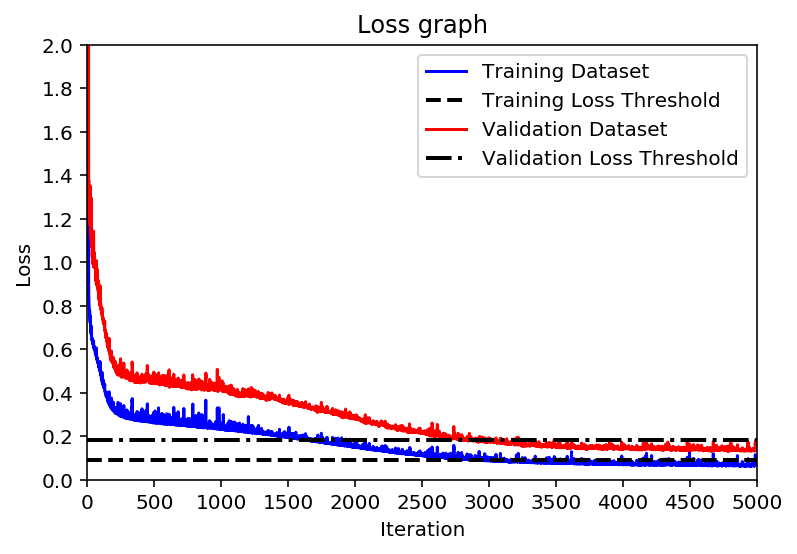

In [21]:
# Represent the training and validation losses for the best model:
fig, ax = plt.subplots()

# Configuration of the graph:
ax.set_title('Loss graph')
ax.plot(losses['train'], color='blue', linestyle='solid',\
        label='Training Dataset')
ax.plot([0, 5000], [0.09, 0.09], color='black', linestyle='--',\
        linewidth=2, label='Training Loss Threshold')
ax.plot(losses['validation'], color='red', linestyle='solid',\
        label='Validation Dataset')
ax.plot([0, 5000], [0.18, 0.18], color='black', linestyle='-.',\
        linewidth=2, label='Validation Loss Threshold')
ax.legend()
ax.set_xlim(0, 5000)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(11))
ax.set_xlabel('Iteration')
ax.set_ylim(0, 2.)
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(11))
ax.set_ylabel('Loss')

# Save the training graph:
fig.savefig('graphs/training_graph.png')

## Testing the network

Now, to check out our predictions, we are going to use the test data set to view how well our neural network is modeling the data.

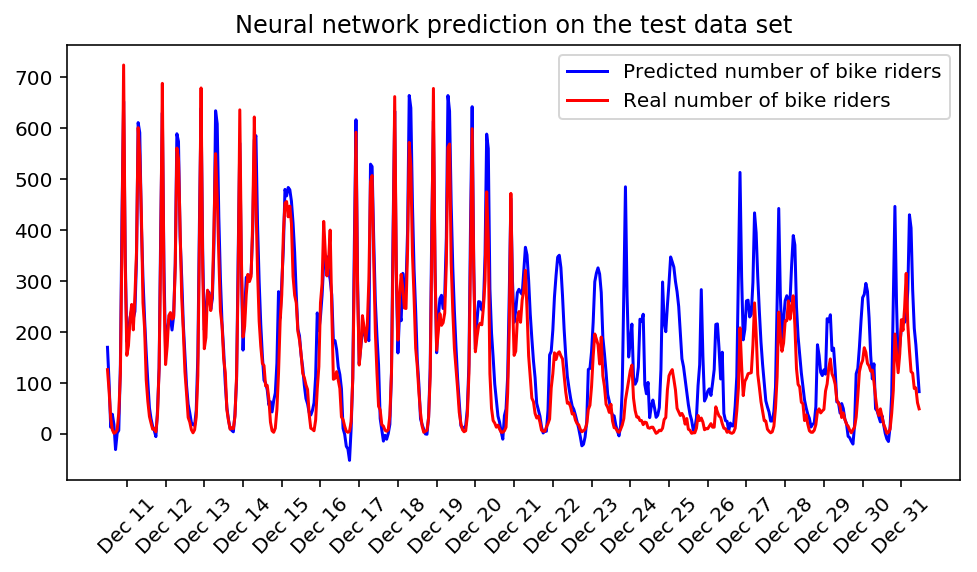

In [22]:
# Represent our prediction on the the test dat set:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title('Neural network prediction on the test data set')

# Configure some variables:
mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
dates = pd.to_datetime(rides.loc[rides.index[test_data.index]]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))

# Configuration of the graph:
ax.plot(predictions[0], color='blue', linestyle='solid',\
        label='Predicted number of bike riders')
ax.plot((test_targets['cnt']*std + mean).values, color='red', linestyle='solid',\
        label='Real number of bike riders')
ax.set_xticks(np.arange(len(dates))[12::24])
ax.set_xticklabels(dates[12::24], rotation=45)
ax.legend()

# Save the prediction graph:
fig.savefig('graphs/prediction_graph.png')

Here, we can observe that our neural network acts in a consistent way during the first ten days of the test data set, but overestimates the number of bike riders between December 22th and December 31st.

Two important elements can explain this observation:
- The first one, and the strongest, is due to the fact that this period corresponds to the end of the year, a period with a lot of persons in holidays, and our used data set, only composed of two years of registrations, is probably (clearly) too poor to allow our model to capture this very particular event.
- The second one can be put in relation with the architecture of our neural network, which is very simple and basic.